# Fuzzy CoCo - Fuzzy Modelling for Explainable Artificial Intelligence



Fuzzycocopython is under developpment and is accessible on request / repo has been made public here: TODO / is currently not publicly available. 

Your first need to clone the repository by running `git clone asdfasdf`

IMPTOX STUFF

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import kagglehub

To import fuzzycocopython, we need to be in the cloned git repository. For this, replace the path in the cd command bellow to adjust the path to where you clone the fuzzycocopython repository.

In [17]:
wd = !pwd  # Execute `pwd` and capture the output as a Python list - current working is in wd[0]
print(f"Current working directory: {wd[0]}")  # Print the working directory


# For the particular case of fuzzycocopython, once the repository is cloned switch directory for import and come back to the original working directory
%cd /mnt/c/Users/TSchowing/Desktop/repositories/fuzzycocopython/

import fuzzycocopython

#%cd {wd[0]}


Current working directory: /mnt/c/Users/TSchowing/Desktop/repositories/fuzzycocopython
/mnt/c/Users/TSchowing/Desktop/repositories/fuzzycocopython


/mnt/c/Users/TSchowing/Desktop/repositories/IMPTOX_XAI/.venvfuzzycoco/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Here we load the data. For this example we will use the pima indian diabetes dataset. 

In [18]:
# Download latest version
path = kagglehub.dataset_download("gargmanas/pima-indians-diabetes")

print("Path to dataset files:", path )

df = pd.read_csv(path + '/pima-indians-diabetes.csv')
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','OUT']

X = df.drop('OUT', axis=1)
y = df['OUT']

# Just to confirm that X is a DataFrame
if isinstance(X, pd.DataFrame):
    print("Yes, X is a DataFrame")
else:
    raise ValueError("X is not a DataFrame")

Path to dataset files: /home/twg/.cache/kagglehub/datasets/gargmanas/pima-indians-diabetes/versions/1
Yes, X is a DataFrame


We can directly define an evolution (a model) with certain parameters. However, the power of fuzzycocopython is that it is compatible with scikit-learn which allows to perform grid search to find the best hyper-parameters and fit different models. 

In [22]:


#model = fuzzycocopython.FuzzyCocoClassifier({'maxGenPop1': 500, 'accuracyW': 0.25, 'dontCareW': 0.05, 'ppvW': 0.5, 'rmseW': 0.25, 'sensitivityW': 1.0, 'specificityW': 1.0, 'cxProbPop1': 0.7, 'cxProbPop2': 0.8, 'elitePop1': 6, 'elitePop2': 6, 'popSizePop1': 250, 'popSizePop2': 250})

# Define parameter grids to choose from (just examples)
fuzzy_system = {
    "nbRules": [5],
    "nbMaxVarPerRule": [3],
    "nbInSets": [3],
    "nbOutSets": [2],
}

fitness_parameters = {
    "sensitivityW": [0.5, 1.0],
    "specificityW": [0.5, 1.0],
    "accuracyW": [0.2],
    "ppvW": [0.5],
    "rmseW": [0.5],
    "dontCareW": [0.05, 0.1]
}

co_evolution = {
    "popSizePop1": [250],
    "popSizePop2": [250],
    "cxProbPop1": [0.7],
    "elitePop1": [5],
    "elitePop2": [5],
    "cxProbPop2": [0.6],
}



# Combine all parameter grids
grid = {
    "fuzzy_system": fuzzy_system,
    "fitness_parameters": fitness_parameters,
    "co_evolution": co_evolution,
}

# Repeated Stratified K-Fold (n_splits=4, controlled by n_repeats)
rskf = RepeatedStratifiedKFold(
    n_splits=4, 
    n_repeats=1, 
    random_state=42  # You can change this seed if desired
)

param_grid = grid['fuzzy_system']


model = fuzzycocopython.FuzzyCocoClassifier()

gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=rskf,
    n_jobs=1,
    scoring='accuracy',
    verbose=3,
    return_train_score=True
)

# Fit the grid search
gs.fit(X, y, store_fitness_curve=True)

# Export results to a DataFrame
results = pd.DataFrame(gs.cv_results_)
#results.to_csv(output_path, index=False)



Fitting 4 folds for each of 1 candidates, totalling 4 fits
Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[CV 1/4] END nbInSets=3, nbMaxVarPerRule=3, nbOutSets=2, nbRules=5;, score=(train=0.790, test=0.729) total time=  53.3s
Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[CV 2/4] END nbInSets=3, nbMaxVarPerRule=3, nbOutSets=2, nbRules=5;, score=(train=0.753, test=0.750) total time=  26.6s
Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[CV 3/4] END nbInSets=3, nbMaxVarPerRule=3, nbOutSets=2, nbRules=5;, score=(train=0.744, test=0.682) total time= 1.2min
Feature names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[CV 4/4] END nbInSets=3, nbMaxVarPerRule=3, nbOutSets=2, nbRules=

In [23]:
results.to_csv("./results_fuzzy.csv", index=False)

In [24]:
results = pd.read_csv("./results_fuzzy.csv")
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_nbInSets,param_nbMaxVarPerRule,param_nbOutSets,param_nbRules,params,split0_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,50.242404,16.036695,0.003964,0.00063,3,3,2,5,"{'nbInSets': 3, 'nbMaxVarPerRule': 3, 'nbOutSe...",0.729167,...,0.696335,0.714448,0.026658,1,0.789565,0.753043,0.744348,0.704861,0.747954,0.030114


In [25]:
# Print best parameters and score
print("Best Parameters:", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Parameters: {'nbInSets': 3, 'nbMaxVarPerRule': 3, 'nbOutSets': 2, 'nbRules': 5}
Best Score: 0.7144483529668411


In [26]:
gs.best_estimator_.rules_

[IF (Glucose is Glucose.3), THEN (OUT is OUT.2),
 IF (Age is Age.1), THEN (OUT is OUT.1)]

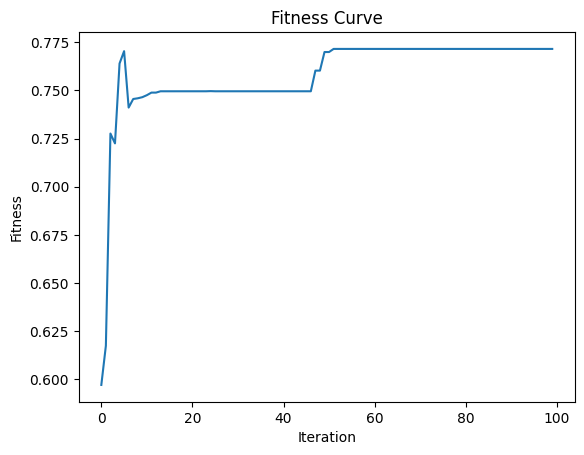

In [27]:
import matplotlib.pyplot as plt
plot = gs.best_estimator_.fitness_curve_

plt.plot(plot)
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Fitness Curve')
plt.show()

In [29]:
gs.best_estimator_.rules_

[IF (Glucose is Glucose.3), THEN (OUT is OUT.2),
 IF (Age is Age.1), THEN (OUT is OUT.1)]

In [30]:
gs.best_estimator_.default_rules_

[ELSE (OUT is OUT.2)]

In [33]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,85,66,29,0,26.6,0.351,31
1,8,183,64,0,0,23.3,0.672,32
2,1,89,66,23,94,28.1,0.167,21
3,0,137,40,35,168,43.1,2.288,33
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63
763,2,122,70,27,0,36.8,0.340,27
764,5,121,72,23,112,26.2,0.245,30
765,1,126,60,0,0,30.1,0.349,47


In [41]:
ypred, importances = gs.best_estimator_.predict_with_importances(X.loc[8])

In [42]:
importances

[{'antecedents': [{'var_name': 'Glucose', 'set_name': 'Glucose.3'}],
  'consequents': [{'var_name': 'OUT', 'set_name': 'OUT.2'}],
  'activation': 0.0},
 {'antecedents': [{'var_name': 'Age', 'set_name': 'Age.1'}],
  'consequents': [{'var_name': 'OUT', 'set_name': 'OUT.1'}],
  'activation': 0.0}]

Result (SingletonFIS): {'OUT': np.float64(0.8084464615384614)}
Result (C++ Model): [0.80844646]
Crisp Output (SingletonFIS): 0.8084464615384614


/mnt/c/Users/TSchowing/Desktop/repositories/IMPTOX_XAI/.venvfuzzycoco/lib/python3.12/site-packages/lfa_toolbox/view/mf_viewer.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  self._ax.plot([in_val, in_val], [0, mf_val], "r", c=self._color)


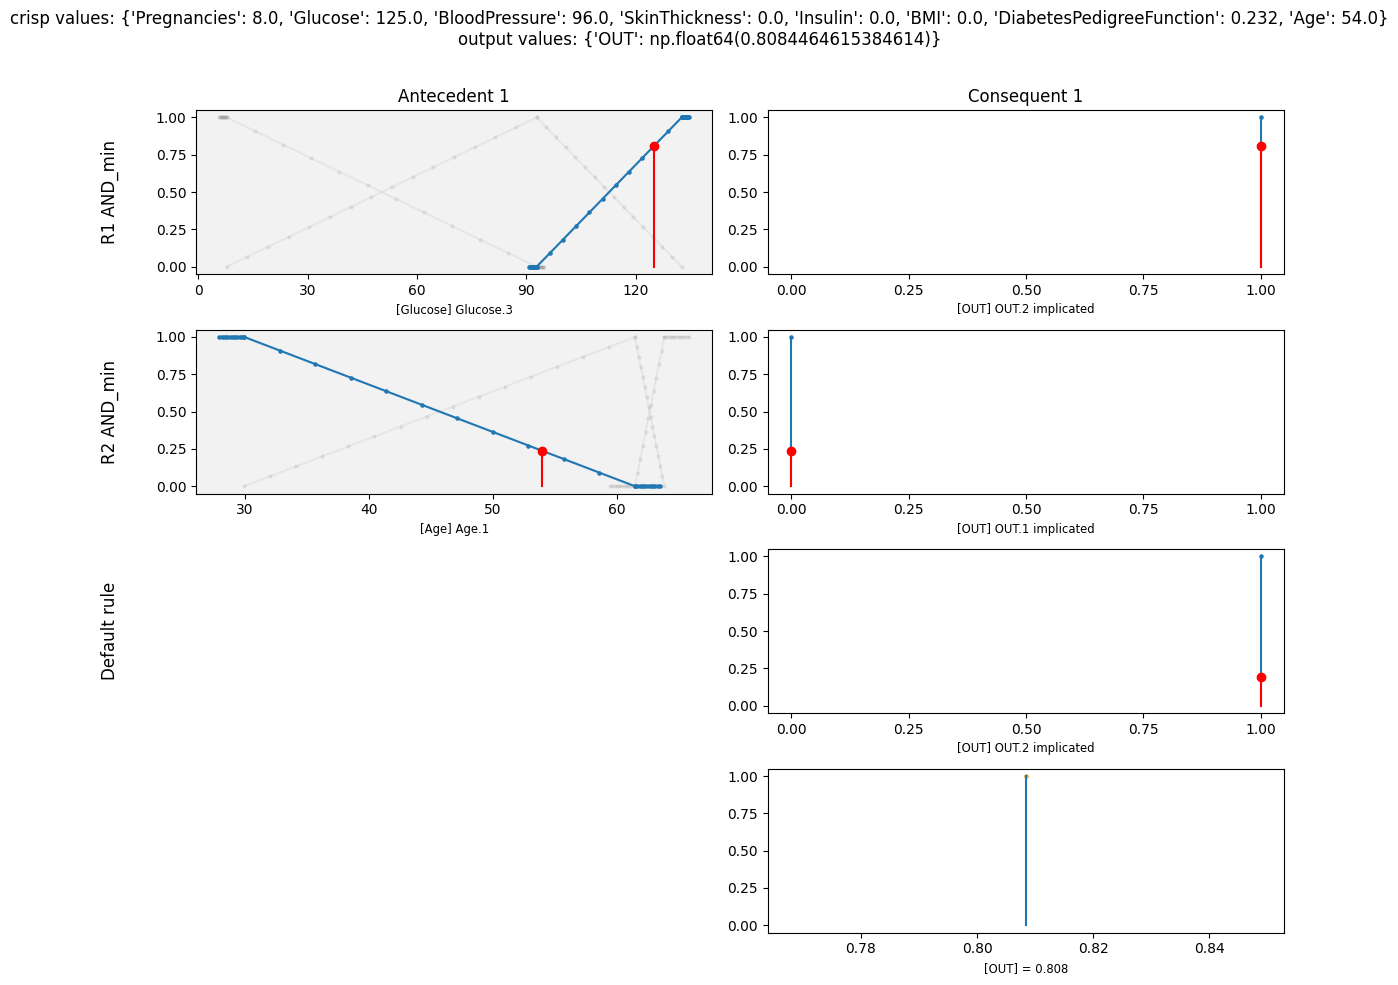

In [40]:
gs.best_estimator_.plot_aggregated_output(X.loc[8], feature_names=X.columns)

In [43]:
!pip show fuzzycocopython

Name: fuzzycocopython
Version: 0.0.1
Summary: Python API for FuzzyCoco using C++ bindings
Home-page: 
Author: 
Author-email: Arthur Babey <arthur.babey@heig-vd.ch>
License: 
Location: /mnt/c/Users/TSchowing/Desktop/repositories/IMPTOX_XAI/.venvfuzzycoco/lib/python3.12/site-packages
Requires: numpy, pandas, pre-commit, pybind11, pybind11-global, pytest, scikit-learn, scikit_build_core
Required-by: 


In [ ]:
!ls /mnt/c/Users/TSchowing/Desktop/repositories/IMPTOX_XAI/.venvfuzzycoco/lib/python3.12/site-packages/fuzzycocopython/


__init__.py  demo-notebook.ipynb  fuzzycoco_classifier.py  fuzzysystem.ffs
__pycache__  fuzzycoco_base.py	  fuzzycoco_regressor.py   utils.py
